In [6]:
!pip install tensorflow==2.5.1 tensorflow-gpu==2.5.1 opencv-python mediapipe sklearn matplotlib 

In [7]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2. Keypoints Using MP Holistic

In [9]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [10]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [11]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [12]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness = 1, circle_radius = 1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness = 1, circle_radius = 1)
                             )
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness = 2, circle_radius = 4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness = 2, circle_radius = 2)
                             )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness = 2, circle_radius = 4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness = 2, circle_radius = 2)
                             )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness = 2, circle_radius = 4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness = 2, circle_radius = 2)
                             )

In [13]:
cap = cv2.VideoCapture(0)
#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
 
        # Read feed
        ret, frame = cap.read()
        
 
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
         
        # Draw landmarks
        draw_styled_landmarks(image, results)
 
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
 
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [14]:
results.face_landmarks

landmark {
  x: 0.5432580709457397
  y: 0.4359567165374756
  z: -0.024807963520288467
}
landmark {
  x: 0.5408963561058044
  y: 0.39391055703163147
  z: -0.055255647748708725
}
landmark {
  x: 0.5414231419563293
  y: 0.404570609331131
  z: -0.026355935260653496
}
landmark {
  x: 0.5290453433990479
  y: 0.3457518517971039
  z: -0.044941071420907974
}
landmark {
  x: 0.5400701761245728
  y: 0.3800306022167206
  z: -0.059834714978933334
}
landmark {
  x: 0.5389282703399658
  y: 0.3600848317146301
  z: -0.057129427790641785
}
landmark {
  x: 0.5359869003295898
  y: 0.31043046712875366
  z: -0.03372034803032875
}
landmark {
  x: 0.46178507804870605
  y: 0.3088914155960083
  z: 0.007935998030006886
}
landmark {
  x: 0.534418523311615
  y: 0.2804604172706604
  z: -0.031019503250718117
}
landmark {
  x: 0.5335361361503601
  y: 0.26296380162239075
  z: -0.03554840013384819
}
landmark {
  x: 0.5297474265098572
  y: 0.19185544550418854
  z: -0.030375514179468155
}
landmark {
  x: 0.54363298416137

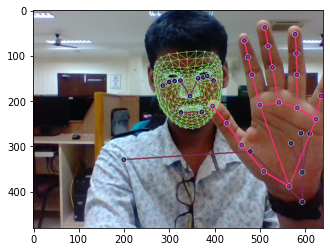

In [15]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Extract Keypoint Values

In [16]:
len(results.right_hand_landmarks.landmark)*3

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
len(results.face_landmarks.landmark)*3

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)

In [ ]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.540851  ,  0.39483097, -0.8380726 , ...,  0.        ,
        0.        ,  0.        ])

In [19]:
np.save('0',result_test)

In [25]:
np.load('0.npy')

array([ 0.540851  ,  0.39483097, -0.8380726 , ...,  0.        ,
        0.        ,  0.        ])

Setups Folders For Collection

In [ ]:
#Path for exported data, numpy array
DATA_PATH = os.path.join('MP_DATA')

#Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

#Thirty videos worth of data
no_sequences = 30

#Videos are going to be 30 frames in length
sequence_length = 30

In [ ]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                
                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                #print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                #Apply wait logic
                if frame_num = 0:
                    cv2.putText(image, 'Starting Collection', (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                
                #Export Keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action, str(Sequence, str(frame_num)))
                np.save(npy_path, keypoints)
                
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.DestroyAllWindows()